# 데이터 전처리


In [1]:
# 구글 드라이브에 있는 파일 가져오기
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
TRAIN_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/preprocessed_train_data.csv'
TEST_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/preprocessed_test_data.csv'

In [2]:
import sys, os
sys.path.append(os.pardir)

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import pickle

train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

NameError: ignored

In [ ]:
print('훈련 데이터 개수 : {}'.format(train.shape))
train.head()

훈련 데이터 개수 : (249948, 2)


,Genre,Lyrics
0,Rock,it starts with pain followed by hate fueled by...
1,Rock,freedom alone again again alone patiently wait...
2,Rock,biting the hand that feeds you lying to the vo...
3,Rock,you say you know just who i am but you can t i...
4,Rock,my heart is beating faster can t control these...


In [ ]:
print('테스트 데이터 개수 : {}'.format(test.shape))
test.head()

테스트 데이터 개수 : (7935, 2)


,Genre,Lyrics
0,Hip-Hop,most folks spend their days daydreaming of fin...
1,Indie,take your cold hands and put them on my face s...
2,Metal,are you ready it s time for war we ll break do...
3,Pop,you ask me why i change the color of my hair y...
4,Hip-Hop,do you believe in magic in a young girl s hear...


In [ ]:
# 중복 제거
train = train.drop_duplicates(['Lyrics'])
test = test.drop_duplicates(['Lyrics'])

# 중복 제거 후 개수 출력
print('훈련 데이터 개수 : {}'.format(train.shape))
print('테스트 데이터 개수 : {}'.format(test.shape))

훈련 데이터 개수 : (209274, 2)
테스트 데이터 개수 : (7932, 2)


In [ ]:
# Null 제거
train = train.dropna(how='any')
test = test.dropna(how='any')

# Null 제거 후 개수 출력
print('훈련 데이터 개수 : {}'.format(train.shape))
print('테스트 데이터 개수 : {}'.format(test.shape))

훈련 데이터 개수 : (209273, 2)
테스트 데이터 개수 : (7932, 2)


In [ ]:
# 전처리된 데이터 저장
train.to_csv(TRAIN_PATH)
test.to_csv(TEST_PATH)

# 토큰화 & 정수 인코딩

In [ ]:
# X_train, y_train 형태로 만들기
# X_train
X_train = []
for lyric in train['Lyrics']:
  words = lyric.split()
  X_train.append(words)

# y_train
y_train = np.array(train['Genre'])

# X_test
X_test = []
for lyric in test['Lyrics']:
  words = lyric.split()
  X_test.append(words)

# y_test
y_test = np.array(test['Genre'])

In [ ]:
# pickle 파일로 저장
X_TRAIN_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/X_train.pickle'
Y_TRAIN_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/y_train.pickle'
X_TEST_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/X_test.pickle'
Y_TEST_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/y_test.pickle'

with open(X_TRAIN_PATH, 'wb') as f:
  pickle.dump(X_train, f)

with open(Y_TRAIN_PATH, 'wb') as f:
  pickle.dump(y_train, f)

with open(X_TEST_PATH, 'wb') as f:
  pickle.dump(X_test, f)

with open(Y_TEST_PATH, 'wb') as f:
  pickle.dump(y_test, f)

In [3]:
# X_train, y_train, X_test, y_test 로딩
X_TRAIN_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/X_train.pickle'
Y_TRAIN_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/y_train.pickle'
X_TEST_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/X_test.pickle'
Y_TEST_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/y_test.pickle'

with open(X_TRAIN_PATH, 'rb') as f:
    X_train = pickle.load(f)

with open(Y_TRAIN_PATH, 'rb') as f:
    y_train = pickle.load(f)

with open(X_TEST_PATH, 'rb') as f:
    X_test = pickle.load(f)

with open(Y_TEST_PATH, 'rb') as f:
    y_test = pickle.load(f)

In [4]:
# 정수 인코딩
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print('단어집합의 크기: ', len(tokenizer.word_index))

단어집합의 크기:  169470


In [5]:
# 등장 빈도수가 THRESHOLD 미만인 단어가 얼만큼의 비중을 차지하는지 확인
def GetRareWordRatio(vocab, threshold):
  total_cnt = len(vocab.word_index)
  rare_cnt = 0
  total_freq = 0
  rare_freq = 0

  for key, value in vocab.word_counts.items():
    total_freq += value
    if (value < threshold):
      rare_cnt += 1
      rare_freq += value
  
  print('단어 집합(vocabulary)의 크기 :',total_cnt)
  print('등장 빈도가 %s번 미만인 희귀 단어의 수: %s'%(threshold, rare_cnt))
  print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
  print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [ ]:
# threshold = 3 확인
GetRareWordRatio(tokenizer, 3)

단어 집합(vocabulary)의 크기 : 169470
등장 빈도가 3번 미만인 희귀 단어의 수: 95768
단어 집합에서 희귀 단어의 비율: 56.51029680769458
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.22023601824235298


In [ ]:
# threshold = 5 확인
GetRareWordRatio(tokenizer, 5)

단어 집합(vocabulary)의 크기 : 169470
등장 빈도가 5번 미만인 희귀 단어의 수: 114357
단어 집합에서 희귀 단어의 비율: 67.47919985838202
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.33747560886097966


In [ ]:
# threshold = 10 확인
GetRareWordRatio(tokenizer, 10)

단어 집합(vocabulary)의 크기 : 169470
등장 빈도가 10번 미만인 희귀 단어의 수: 130754
단어 집합에서 희귀 단어의 비율: 77.15465864164749
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.5374776742676718


In [ ]:
# threshold = 30 확인
GetRareWordRatio(tokenizer, 30)

단어 집합(vocabulary)의 크기 : 169470
등장 빈도가 30번 미만인 희귀 단어의 수: 147593
단어 집합에서 희귀 단어의 비율: 87.09093054817963
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.065518512762085


In [11]:
# threshold = 500 확인
GetRareWordRatio(tokenizer, 500)

단어 집합(vocabulary)의 크기 : 169470
등장 빈도가 500번 미만인 희귀 단어의 수: 165233
단어 집합에서 희귀 단어의 비율: 97.49985248126512
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.00543168647008


등장 빈도가 30회 미만인 희귀 단어가 등장하는 비율은 1% 정도..   
1% 단어를 무시함으로써 단어집합의 크기를 비약적으로 줄일 수 있음   

In [ ]:
# 희귀 단어의 등장 빈도 설정
THRESHOLD = 30

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

vocab_size = len(tokenizer.word_index) - 147593 + 1   # 0번 패딩 토큰 고려하여 +1
print('vocab_size: ', vocab_size)

# 단어집합 크기 제한하여 생성
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

# pickle 파일로 저장
VOCAB_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/tokenizer.pickle'
VOCAB_SIZE_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/vocab_size.pickle'
with open(VOCAB_PATH, 'wb') as f:
  pickle.dump(tokenizer, f)

with open(VOCAB_SIZE_PATH, 'wb') as f:
  pickle.dump(vocab_size, f)

vocab_size:  21878


threshold = 500


In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

vocab_size = len(tokenizer.word_index) - 165233 + 1   # 0번 패딩 토큰 고려하여 +1
print('vocab_size: ', vocab_size)

# 단어집합 크기 제한하여 생성
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

vocab_size:  4238


In [ ]:
# 단어집합 로딩
import pickle

VOCAB_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/tokenizer.pickle'
VOCAB_SIZE_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/vocab_size.pickle'
with open(VOCAB_PATH, 'rb') as f:
  tokenizer = pickle.load(f)

with open(VOCAB_SIZE_PATH, 'rb') as f:
  vocab_size = pickle.load(f)

print('로딩된 단어 집합(vocabulary)의 크기 :', vocab_size)

로딩된 단어 집합(vocabulary)의 크기 : 21878


In [13]:
# X 정수 인코딩
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# 희귀단어 제외하는 과정에서 생기는 빈 샘플 제거하기
# 각 샘플들의 길이를 확인해서 길이가 0인 샘플들의 인덱스를 받아온다
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

# 빈 샘플 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

print('빈 샘플 제거 후 X_train 크기: ', len(X_train))
print('빈 샘플 제거 후 y_train 크기: ', len(y_train))

drop_test = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]

X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)

print('빈 샘플 제거 후 X_test 크기: ', len(X_test))
print('빈 샘플 제거 후 y_test 크기: ', len(y_test))

빈 샘플 제거 후 X_train 크기:  209270
빈 샘플 제거 후 y_train 크기:  209270
빈 샘플 제거 후 X_test 크기:  7932
빈 샘플 제거 후 y_test 크기:  7932


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


threshold = 500

In [14]:
# 희귀단어 제외하는 과정에서 생기는 빈 샘플 제거하기
# 각 샘플들의 길이를 확인해서 길이가 0인 샘플들의 인덱스를 받아온다
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

# 빈 샘플 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

print('빈 샘플 제거 후 X_train 크기: ', len(X_train))
print('빈 샘플 제거 후 y_train 크기: ', len(y_train))

drop_test = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]

X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)

print('빈 샘플 제거 후 X_test 크기: ', len(X_test))
print('빈 샘플 제거 후 y_test 크기: ', len(y_test))

빈 샘플 제거 후 X_train 크기:  209265
빈 샘플 제거 후 y_train 크기:  209265
빈 샘플 제거 후 X_test 크기:  7932
빈 샘플 제거 후 y_test 크기:  7932


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [15]:
# y 정수 인코딩
label_vocab = {'Hip-Hop': 0,
               'Indie': 1,
               'Metal': 2,
               'Pop': 3,
               'Country': 4,
               'Jazz': 5,
               'Rock': 6,
               'R&B': 7,
               'Electronic': 8,
               'Folk': 9}

# y_train
y_train_encoded = []
for word in y_train:
  y_train_encoded.append(label_vocab[word])

# y_test
y_test_encoded = []
for word in y_test:
  y_test_encoded.append(label_vocab[word])

threshold = 500

In [16]:
y_train = np.array(y_train_encoded)
y_test = np.array(y_test_encoded)

In [ ]:
# 정수 인코딩된 X_train, y_train, X_test, y_test pickle 파일로 저장
X_TRAIN_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/X_train_encoded.pickle'
Y_TRAIN_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/y_train_encoded.pickle'
X_TEST_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/X_test_encoded.pickle'
Y_TEST_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/y_test_encoded.pickle'

with open(X_TRAIN_PATH, 'wb') as f:
  pickle.dump(X_train, f)

with open(Y_TRAIN_PATH, 'wb') as f:
  pickle.dump(y_train_encoded, f)

with open(X_TEST_PATH, 'wb') as f:
  pickle.dump(X_test, f)

with open(Y_TEST_PATH, 'wb') as f:
  pickle.dump(y_test_encoded, f)

In [ ]:
# X_train, y_train, X_test, y_test 로딩
X_TRAIN_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/X_train_encoded.pickle'
Y_TRAIN_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/y_train_encoded.pickle'
X_TEST_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/X_test_encoded.pickle'
Y_TEST_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/y_test_encoded.pickle'

with open(X_TRAIN_PATH, 'rb') as f:
    X_train = pickle.load(f)

with open(Y_TRAIN_PATH, 'rb') as f:
    y_train = pickle.load(f)

with open(X_TEST_PATH, 'rb') as f:
    X_test = pickle.load(f)

with open(Y_TEST_PATH, 'rb') as f:
    y_test = pickle.load(f)

In [ ]:
# 변수 정리
y_train = np.array(y_train)
y_test = np.array(y_test)

max length :  3355
average length :  255.44612701294977


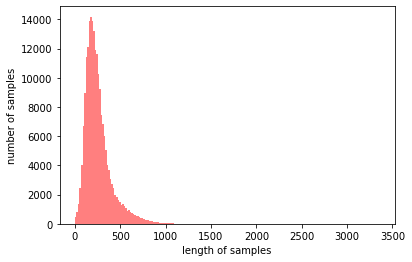

In [ ]:
# 길이 분포 확인
print('max length : ', max(len(i) for i in X_train))
print('average length : ', sum(map(len, X_train))/len(X_train))

plt.hist([len(s) for s in X_train], bins=200, alpha=0.5, color='r')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# 전체 샘플 중 길이가 max_len이하인 샘플의 비율이 몇 %인지 확인하는 함수
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
below_threshold_len(1000, X_train)
below_threshold_len(1000, X_test)

전체 샘플 중 길이가 1000 이하인 샘플의 비율: 99.80551440722512
전체 샘플 중 길이가 1000 이하인 샘플의 비율: 99.71003530005042


In [ ]:
below_threshold_len(800, X_train)
below_threshold_len(800, X_test)

전체 샘플 중 길이가 800 이하인 샘플의 비율: 99.06771156878673
전체 샘플 중 길이가 800 이하인 샘플의 비율: 98.65103378719112


In [ ]:
below_threshold_len(700, X_train)
below_threshold_len(700, X_test)

전체 샘플 중 길이가 700 이하인 샘플의 비율: 98.02695082907249
전체 샘플 중 길이가 700 이하인 샘플의 비율: 97.37771053958649


In [ ]:
below_threshold_len(500, X_train)
below_threshold_len(500, X_test)

전체 샘플 중 길이가 500 이하인 샘플의 비율: 92.85181822525924
전체 샘플 중 길이가 500 이하인 샘플의 비율: 91.78013111447302


일단 샘플 길이는 *1000* 으로 결정   


In [17]:
FIX_LEN = 1000

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, FIX_LEN)
X_test = pad_sequences(X_test, FIX_LEN)

In [19]:
# shape 확인
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(209265, 1000)
(209265,)
(7932, 1000)
(7932,)


# 모델 선언 및 학습


In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, LSTM, RNN, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [21]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
N_VOCAB = vocab_size
print('단어집합 크기: ', N_VOCAB)

model = Sequential()
model.add(Embedding(N_VOCAB, 100))
model.add(LSTM(128))
model.add(Dense(10, activation='softmax'))

mc = ModelCheckpoint(
    'best_model.h5',
    monitor='val_acc',
    mode='max',
    verbose=1,
    save_best_only=True)

model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=100,
    validation_split=0.2,
    callbacks=[mc]
)

단어집합 크기:  21878
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         2187800   
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,306,338
Trainable params: 2,306,338
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1675/1675 [==============================] - 329s 195ms/step - loss: 1.1610 - accuracy: 0.5663 - val_loss: 2.4484 - val_accuracy: 0.4519
Epoch 2/20
1675/1675 [==============================] - 327s 195ms/step - loss: 0.9872 - accuracy: 0.6488 - val_loss: 2.5341 - val_accuracy: 0.4

KeyboardInterrupt: ignored

In [ ]:
N_VOCAB = vocab_size
print('단어집합 크기: ', N_VOCAB)

model = Sequential()
model.add(Embedding(N_VOCAB, 100))
model.add(LSTM(64))
model.add(Dense(10, activation='softmax'))

mc = ModelCheckpoint(
    'best_model.h5',
    monitor='val_acc',
    mode='max',
    verbose=1,
    save_best_only=True)

model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=1000,
    validation_split=0.2,
    callbacks=[mc]
)

단어집합 크기:  21878
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         2187800   
                                                                 
 lstm_6 (LSTM)               (None, 64)                42240     
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 2,230,690
Trainable params: 2,230,690
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
168/168 [==============================] - 83s 478ms/step - loss: 1.3471 - accuracy: 0.4780 - val_loss: 2.3661 - val_accuracy: 0.3599
Epoch 2/20
168/168 [==============================] - 80s 478ms/step - loss: 1.1692 - accuracy: 0.5657 - val_loss: 2.8379 - val_accuracy: 0.2747
Ep

In [22]:
N_VOCAB = vocab_size
print('단어집합 크기: ', N_VOCAB)

model = Sequential()
model.add(Embedding(N_VOCAB, 100))
model.add(LSTM(128))
model.add(Dense(10, activation='softmax'))

mc = ModelCheckpoint(
    'best_model.h5',
    monitor='val_acc',
    mode='max',
    verbose=1,
    save_best_only=True)

model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=100,
    validation_split=0.2,
    callbacks=[mc]
)

단어집합 크기:  4238
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         423800    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 542,338
Trainable params: 542,338
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1675/1675 [==============================] - 332s 195ms/step - loss: 1.1356 - accuracy: 0.5784 - val_loss: 2.5582 - val_accuracy: 0.4412
Epoch 2/20
1675/1675 [==============================] - 325s 194ms/step - loss: 0.9943 - accuracy: 0.6425 - val_loss: 2.5904 - val_accuracy: 0.4658
Epo

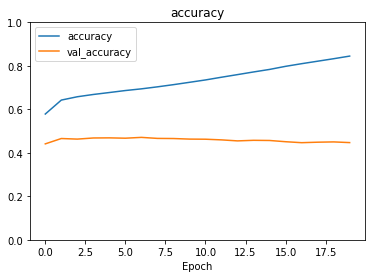

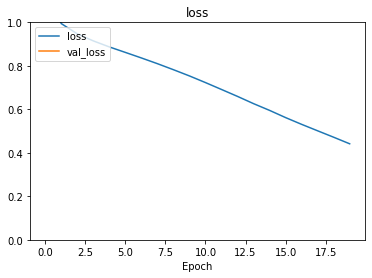

In [23]:
# plot
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [ ]:
# 테스트 데이터로 정확도 측정
loaded_model = load_model('best_model.h5')
loaded_model.evaluate(X_test, y_test)

OSError: ignored